<a href="https://colab.research.google.com/github/Miyaputri/Study-Case-02---Data-Mining-UIN-2024-Kelompok-B/blob/main/Case_Study_02_Kelompok_B_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok B
* Margita Zahra Ramandanisya (11220940000008)
* Qorry Tarania Muntadz (11220940000017)
* Yuliana (11220940000024)
* Miyatunnisa Putri Samma (11220940000025)



# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
import warnings; warnings.simplefilter('ignore')

In [3]:
!pip install kmodes

In [4]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

In [5]:
import pickle

# Loading data


In [6]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/Miyaputri/Study-Case-02---Data-Mining-UIN-2024-Kelompok-B/refs/heads/main/File%20Case%20Study%20-%20File.csv

--2024-10-18 10:40:30--  https://raw.githubusercontent.com/Miyaputri/Study-Case-02---Data-Mining-UIN-2024-Kelompok-B/refs/heads/main/File%20Case%20Study%20-%20File.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10437 (10K) [text/plain]
Saving to: ‘data/File Case Study - File.csv’

File Case Study - F 100%[===================>]  10.19K  --.-KB/s    in 0s      

2024-10-18 10:40:30 (72.8 MB/s) - ‘data/File Case Study - File.csv’ saved [10437/10437]



In [7]:
Data = pd.read_csv("data/File Case Study - File.csv", low_memory = False, encoding='utf8')
Data

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,"Rp33,606,557",86,1,Depok,1.0,Minggu,6
2,103,Pria,51,"Rp15,983,606",41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,"Rp12,704,918",55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,"Rp20,081,967",42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,"Rp4,098,360",73,1,Depok,1.0,Senin,0
196,297,Pria,57,"Rp15,983,606",51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,"Rp43,032,786",79,1,Depok,1.0,Senin,7
198,299,Wanita,23,"Rp1,229,508",94,1,Depok,0.0,Selasa,0


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    object 
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               187 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.8+ KB


In [9]:
Data.describe()

,ID,skor-pengeluaran,Promo,FavFlavor
count,200.000000,200.00000,194.000000,200.000000
mean,200.500000,50.47000,1.685567,3.605000
std,57.879185,26.07101,0.970603,2.743466
min,101.000000,1.00000,0.000000,0.000000
25%,150.750000,34.75000,1.000000,1.000000
50%,200.500000,50.00000,1.000000,3.500000
75%,250.250000,73.00000,3.000000,6.000000
max,300.000000,101.00000,5.000000,9.000000


# Preprocessing

## Cek Duplikat

In [10]:
# Cek duplikat data
Data.duplicated().sum()

0

## Noise dalam Data

In [11]:
Data['Jenis Kelamin'] = Data['Jenis Kelamin'].replace({"-": np.nan}, regex=True)
unique_JenisKelamin = Data['Jenis Kelamin'].unique()
print(unique_JenisKelamin)

['Wanita' 'Pria' nan]


In [12]:
Data.loc[Data['skor-pengeluaran'] > 100, 'skor-pengeluaran'] = np.nan
unique_Skor = Data['skor-pengeluaran'].unique()
print(unique_Skor)

[52. 86. 41. 55. 42. 95. 56. 77. 47. 54. 92. 15.  4. 50. 16. 87. 32. 28.
 79. 59. 60.  7. 75. 57.  6. 73. 69. 40.  5. 89. 49. 13. 88. 48. 10. 36.
  3. 31. 39. 46. 83. 68. 14. 24. 65. 91. 61. 90. 58. 93. 34. 44. 17. 53.
 97. 27. 11. 43. 22. 18. 35. 99. 66. 29.  9. 45. 23. 82. nan 51. 20. 72.
 71.  1. 81. 98. 26. 76. 78. 63. 74. 85. 12.  8. 94.]


In [13]:
Data['Menikah'] = Data['Menikah'].replace({"-": np.nan}, regex=True)
unique_Menikah = Data['Menikah'].unique()
print(unique_Menikah)

['1' '0' nan]


In [14]:
Data['Kota'] = Data['Kota'].replace({"JJakarta": "Jakarta"}, regex=True)
unique_Kota = Data['Kota'].unique()
print(unique_Kota)

['Jakarta' 'Depok' 'Tangerang']


In [15]:
Data.loc[Data['Promo'] >3, 'Promo'] = np.nan
unique_Promo = Data['Promo'].unique()
print(unique_Promo)

[ 1.  2.  0. nan  3.]


In [16]:
Data.loc[Data['FavFlavor'] >8, 'FavFlavor'] = np.nan
unique_Promo = Data['FavFlavor'].unique()
print(unique_Promo)

[ 2.  6.  3.  7.  8.  0.  5.  4.  1. nan]


Dalam proses pembersihan data ini, beberapa kolom dalam dataset diperiksa dan nilai tidak valid dihapus atau diganti dengan NaN.

1. 'Jenis Kelamin': Tanda minus (“-”) diganti dengan NaN.
2. 'skor-pengeluaran': Nilai di atas 100 diubah menjadi NaN.
3. 'Menikah': Tanda minus diganti dengan NaN.
4. 'Kota': Kesalahan pengetikan “JJakarta” diperbaiki menjadi “Jakarta”.
5. 'Promo': Nilai lebih dari 3 diubah menjadi NaN.
6. 'FavFlavor': Nilai di atas 8 diganti dengan NaN.

## Missing Value

In [17]:
# Cek Missing Value
Data.isnull().sum()

,0
ID,0
Jenis Kelamin,5
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,1
Menikah,14
Kota,0
Promo,7
HariFav,0
FavFlavor,1


In [18]:
# Ubah missing value setiap variabel
Data['skor-pengeluaran'].fillna(Data['skor-pengeluaran'].mode()[0], inplace=True)
Data['Jenis Kelamin'].fillna(Data['Jenis Kelamin'].mode()[0], inplace=True)
Data['Menikah'].fillna(Data['Menikah'].mode()[0], inplace=True)
Data['Promo'].fillna(Data['Promo'].mode()[0], inplace=True)
Data['FavFlavor'].fillna(Data['FavFlavor'].mode()[0], inplace=True)
Data.isnull().sum()

,0
ID,0
Jenis Kelamin,0
Umur,0
Pendapatan-per-bulan,0
skor-pengeluaran,0
Menikah,0
Kota,0
Promo,0
HariFav,0
FavFlavor,0


In [19]:
# Cek duplikat data
Data.duplicated().sum()

0

In [20]:
Data

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,"Rp13,114,754",52.0,1,Jakarta,1.0,Sabtu,2.0
1,102,Wanita,32,"Rp33,606,557",86.0,1,Depok,1.0,Minggu,6.0
2,103,Pria,51,"Rp15,983,606",41.0,1,Jakarta,2.0,Minggu,3.0
3,104,Pria,19,"Rp12,704,918",55.0,0,Jakarta,1.0,Rabu,7.0
4,105,Wanita,38,"Rp20,081,967",42.0,1,Jakarta,2.0,Senin,8.0
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,"Rp4,098,360",73.0,1,Depok,1.0,Senin,0.0
196,297,Pria,57,"Rp15,983,606",51.0,1,Jakarta,1.0,Minggu,5.0
197,298,Wanita,35,"Rp43,032,786",79.0,1,Depok,1.0,Senin,7.0
198,299,Wanita,23,"Rp1,229,508",94.0,1,Depok,0.0,Selasa,0.0


Dalam proses penanganan missing value, pengisian Missing Value: Setiap kolom yang memiliki missing value diisi dengan nilai modus (nilai yang paling sering muncul) untuk menjaga representativitas data. Kolom yang diisi meliputi:
1. 'skor-pengeluaran'
2. 'Jenis Kelamin'
3. 'Menikah'
4. 'Promo'
5. 'FavFlavor'

Pemeriksaan Duplikat untuk memastikan dataset tidak hanya bebas dari missing value, tetapi juga tidak mengandung entri yang berulang.

## Mengubah Tipe Data

In [21]:
# Mengubah data dari format string ke numerik
Data['Pendapatan-per-bulan'] = Data['Pendapatan-per-bulan'].replace({'Rp': '', ',': ''}, regex=True)

In [22]:
unique_Umur = Data['Umur'].unique()

print(unique_Umur)

['49' '32' '51' '19' '38' '33' '27' '24' '21' '31' '36' '46' '60' '58'
 '47' '45' '22' '18' '59' '44' '39' '35' '20' '30' '23' '48' '37' '40'
 '34' '41' '53' '54' '28' '55' '25' '50' '42' '29' '43' '52' '2' "35'"
 '56' '26' '57']


In [23]:
# Mengubah data dari format string ke numerik
Data['Umur'] = Data['Umur'].replace({"'": " "}, regex=True)

In [24]:
# Ubah tipe data
Data['Jenis Kelamin'] = Data['Jenis Kelamin'].astype('category')
Data['Umur'] = Data['Umur'].astype('int')
Data['Pendapatan-per-bulan'] = Data['Pendapatan-per-bulan'].astype('int')
Data['skor-pengeluaran'] = Data['skor-pengeluaran'].astype('int')
Data['Menikah'] = Data['Menikah'].astype('category')
Data['Kota'] = Data['Kota'].astype('category')
Data['Promo'] = Data['Promo'].astype('category')
Data['HariFav'] = Data['HariFav'].astype('category')
Data['FavFlavor'] = Data['FavFlavor'].astype('category')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    200 non-null    int64   
 1   Jenis Kelamin         200 non-null    category
 2   Umur                  200 non-null    int64   
 3   Pendapatan-per-bulan  200 non-null    int64   
 4   skor-pengeluaran      200 non-null    int64   
 5   Menikah               200 non-null    category
 6   Kota                  200 non-null    category
 7   Promo                 200 non-null    category
 8   HariFav               200 non-null    category
 9   FavFlavor             200 non-null    category
dtypes: category(6), int64(4)
memory usage: 8.8 KB


In [25]:
Data.describe()

,ID,Umur,Pendapatan-per-bulan,skor-pengeluaran
count,200.000000,200.000000,2.000000e+02,200.000000
mean,200.500000,37.355000,1.867213e+07,50.175000
std,57.879185,11.992417,1.076423e+07,25.829055
min,101.000000,2.000000,0.000000e+00,1.000000
25%,150.750000,28.750000,1.086066e+07,34.750000
50%,200.500000,36.000000,1.905738e+07,50.000000
75%,250.250000,48.000000,2.581967e+07,73.000000
max,300.000000,60.000000,5.000000e+07,99.000000


In [26]:
# Menghapus data umur < 10 (Noise)
Data2 = Data[(Data['Umur'] >= 10)]
Data2

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2.0
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6.0
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3.0
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7.0
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8.0
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0.0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5.0
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7.0
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0.0


Dalam proses penanganan missing value dan pembersihan data, beberapa langkah penting yang dilakukan adalah pertama, kolom 'Pendapatan-per-bulan' dan 'Umur' dibersihkan dari karakter yang tidak perlu, mengubahnya menjadi format numerik. Selanjutnya, nilai unik dalam kolom 'Umur' diperiksa untuk memastikan keabsahan data. Beberapa kolom kemudian diubah menjadi tipe data yang sesuai, dengan kolom kategori seperti 'Jenis Kelamin' dan 'Menikah', serta kolom numerik seperti 'Umur' dan 'Pendapatan-per-bulan'.

Setelah memverifikasi tipe data, analisis deskriptif dilakukan melalui Data. Lalu, data dengan umur kurang dari 10 tahun dihapus untuk mengurangi noise, menghasilkan dataset bersih.

## EDA Numerik

In [27]:
kolom_numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

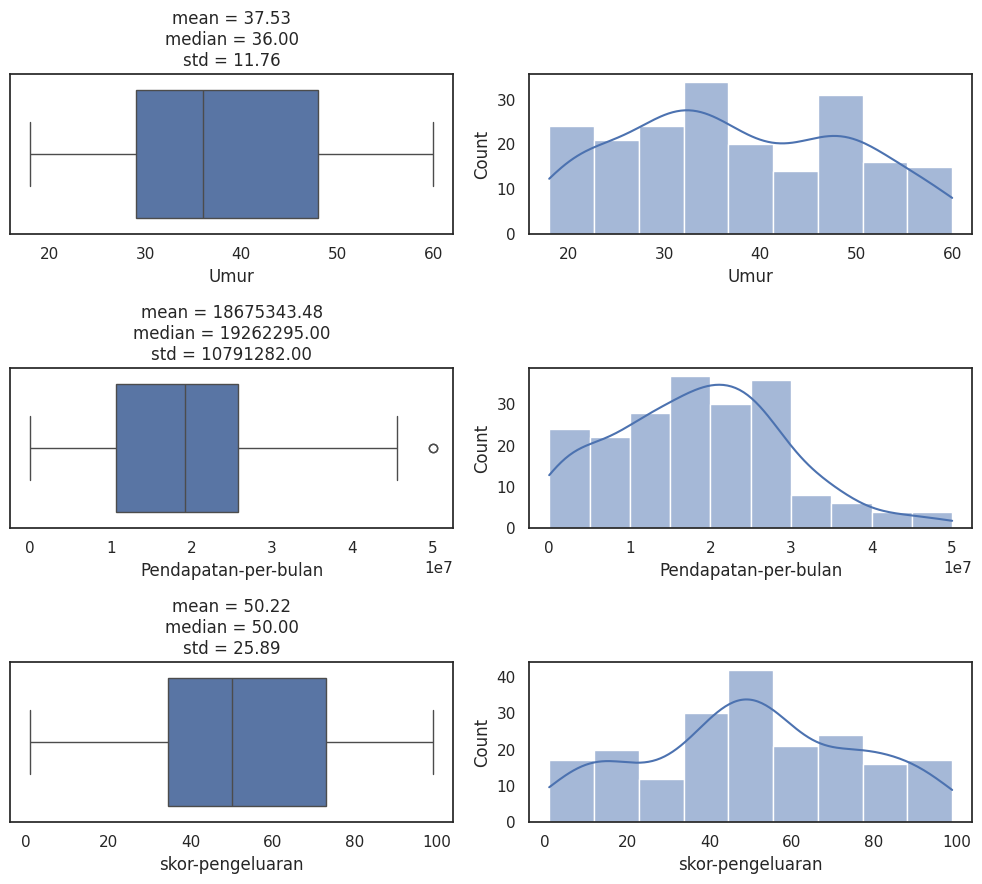

In [28]:
# Mengatur style untuk seaborn
sns.set(style='white')

# Fungsi untuk membuat plot observasi data numerik
def observasi_num(features):
    fig, axs = plt.subplots(len(features), 2, figsize=(10, 9))  # Sesuaikan ukuran subplot dengan jumlah fitur
    for i, kol in enumerate(features):
        sns.boxplot(x=Data2[kol], ax=axs[i, 0])  # Plot boxplot
        sns.histplot(Data2[kol], kde=True, ax=axs[i, 1])  # Plot distribusi (distplot diganti dengan histplot karena distplot deprecated)

        # Menambahkan informasi statistik ke judul boxplot
        axs[i, 0].set_title('mean = %.2f\nmedian = %.2f\nstd = %.2f' %
                            (Data2[kol].mean(), Data2[kol].median(), Data2[kol].std()))

    plt.tight_layout()  # Supaya layout lebih rapih
    plt.show()

# Memanggil fungsi untuk membuat plot untuk data numerik
observasi_num(kolom_numerik)


**1. Segmentasi Berdasarkan Usia**

Dari boxplot dan histogram umur, terlihat bahwa mayoritas pelanggan MixITup berada di rentang usia 30 hingga 50 tahun, dengan usia rata-rata 37,5 tahun dan median 36 tahun. Distribusi usia juga menunjukkan adanya variasi yang cukup merata di seluruh kelompok usia.

Rekomendasi:

Marketing pemasaran yang relevan untuk usia 30-50 tahun: Fokuskan promosi pada produk yang menarik bagi kelompok ini, seperti penawaran "premium" yang menonjolkan kenyamanan dan gaya hidup.
Program loyalitas yang personal: Berikan penawaran spesial saat momen penting, seperti diskon pada hari ulang tahun, program loyalitas berbasis milestone (misalnya, setelah pembelian dalam jumlah tertentu), atau promosi yang menargetkan kebutuhan keluarga seperti produk keluarga dan anak-anak.

**2. Segmentasi Berdasarkan Pendapatan**

 Dari boxplot pendapatan per bulan, terlihat rentang pendapatan yang sangat luas, dari kurang dari 1 juta hingga sekitar 50 juta rupiah. Rata-rata pendapatan bulanan adalah sekitar 18,6 juta rupiah dengan median 19,2 juta rupiah, yang menunjukkan bahwa mayoritas pel anggan MixITup berada di segmen menengah hingga atas.

Rekomendasi:

Penawaran produk yang sesuai dengan segmen pendapatan: Untuk pelanggan dengan pendapatan rendah, tawarkan produk dengan harga terjangkau, seperti paket hemat atau diskon menarik. Sementara itu, untuk pelanggan berpendapatan tinggi, ciptakan layanan atau produk premium seperti pengalaman eksklusif, layanan personalisasi, atau langganan premium.
Dynamic pricing: Sesuaikan penawaran berdasarkan kemampuan finansial pelanggan. Misalnya, bundling produk atau diskon untuk kelompok tertentu, sambil tetap menawarkan layanan eksklusif bagi pelanggan dengan pendapatan lebih tinggi.

**3. Segmentasi Berdasarkan Skor Pengeluaran**

 Data skor pengeluaran menunjukkan rata-rata pengeluaran di sekitar 50 dengan standar deviasi sekitar 25,9. Hal ini mengindikasikan adanya variasi besar dalam pola belanja pelanggan MixITup.

Rekomendasi:

Paket belanja sesuai perilaku konsumen: Ciptakan program yang dapat mendorong pelanggan dengan skor pengeluaran rendah untuk berbelanja lebih banyak, seperti promosi berbasis insentif atau diskon berjenjang. Sementara itu, bagi pelanggan dengan skor pengeluaran tinggi, tawarkan reward atau layanan eksklusif sebagai penghargaan atas loyalitas mereka.

## EDA Katgorik

In [29]:
kolom_kategorik = ['Jenis Kelamin','Menikah','Kota', 'Promo', 'HariFav', 'FavFlavor']

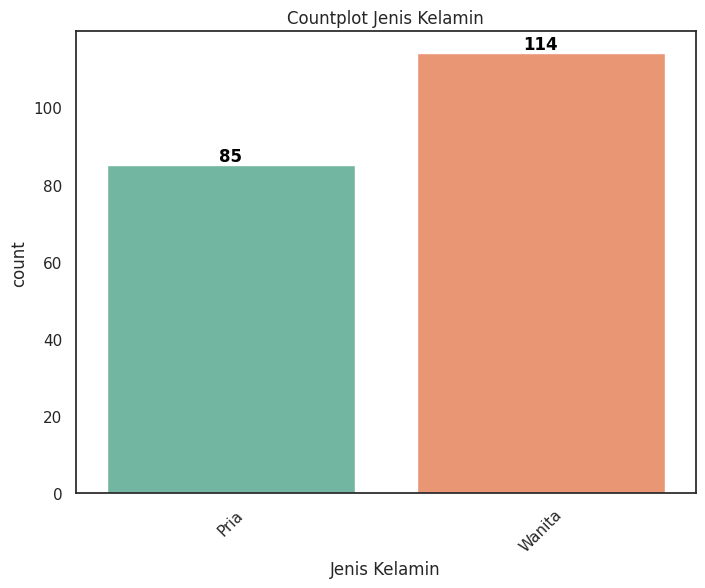

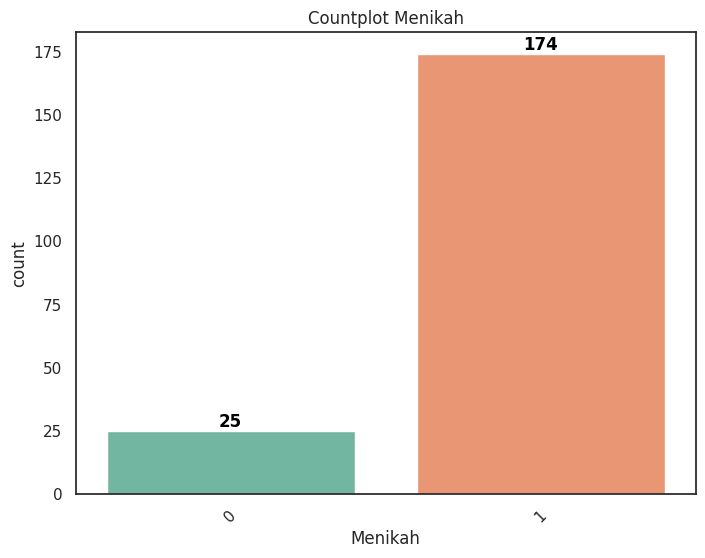

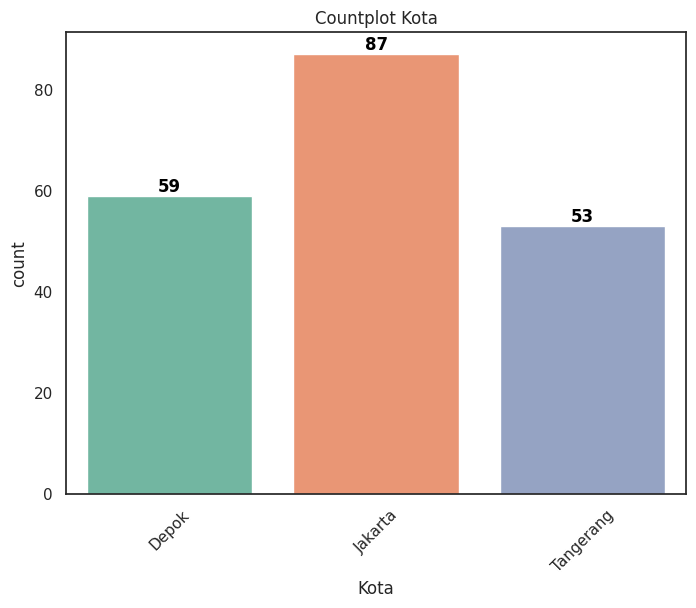

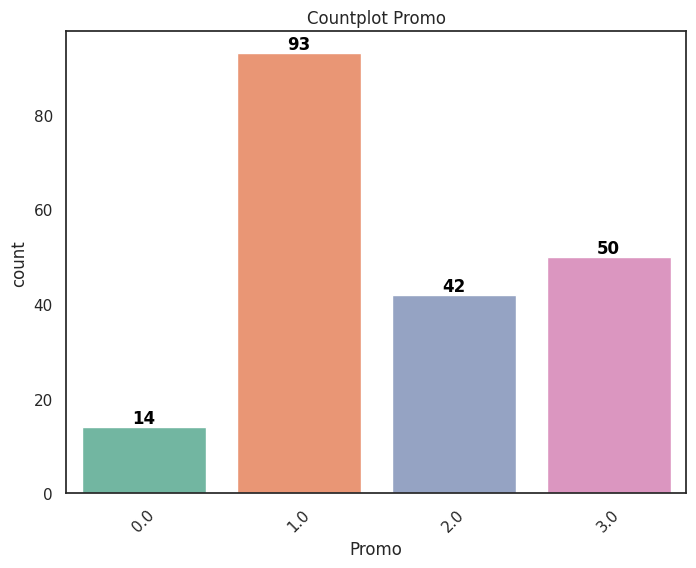

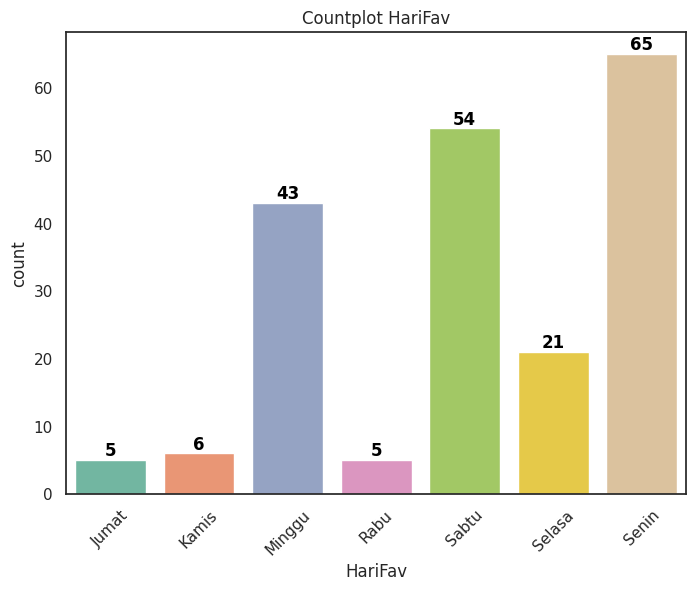

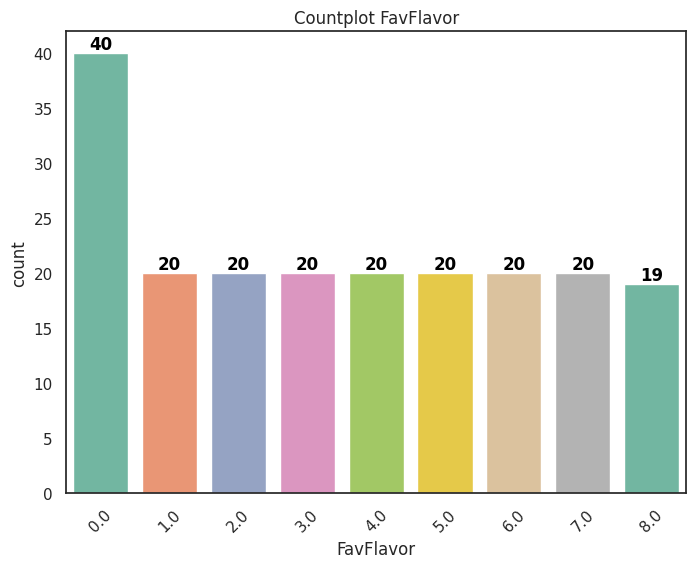

In [30]:
# Daftar kolom kategoris
kolom_kategorik = ['Jenis Kelamin', 'Menikah', 'Kota', 'Promo', 'HariFav', 'FavFlavor']

# Loop untuk membuat countplot dan menampilkan total di atas setiap bar
for kolom in kolom_kategorik:
    plt.figure(figsize=(8, 6))  # Mengatur ukuran plot
    ax = sns.countplot(x=kolom, data=Data2, hue=kolom, palette='Set2', legend=False)  # Memperbaiki penggunaan palette

    # Menambahkan total frekuensi (integer) di atas setiap bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

    plt.title(f'Countplot {kolom}')
    plt.xticks(rotation=45)  # Rotasi label jika diperlukan
    plt.show()

Exploratory Data Analysis (EDA) untuk data kategorik bertujuan untuk memahami distribusi dan frekuensi dari setiap kategori yang terdapat dalam dataset. Visualisasi yang sering digunakan adalah countplot, yang menampilkan jumlah data untuk setiap kategori dalam bentuk grafik bar. Kolom-kolom tersebut meliputi Jenis Kelamin, Status Pernikahan, Kota, Promo, Hari Favorit, dan Rasa Favorit. Dengan menggunakan looping, kode ini membuat grafik bar untuk setiap kolom, yang menampilkan jumlah atau frekuensi dari setiap kategori di dalamnya.

# Standarisasi Kolom Numerik

In [31]:
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(Data2[kolom_numerik ].describe().round(1))

# Standarisasi
Data2_std = StandardScaler().fit_transform(Data2[kolom_numerik])

# Membuat DataFrame
Data2_std = pd.DataFrame(data=Data2_std, index=Data2.index, columns=Data2[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(Data2_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(Data2_std.describe().round(0))

Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  199.0                 199.0             199.0
mean    37.5            18675343.5              50.2
std     11.8            10791282.0              25.9
min     18.0                   0.0               1.0
25%     29.0            10655737.0              34.5
50%     36.0            19262295.0              50.0
75%     48.0            25819672.0              73.0
max     60.0            50000000.0              99.0

Hasil Standarisasi

       Umur  Pendapatan-per-bulan  skor-pengeluaran
0  0.977919             -0.516585          0.068894
1 -0.471818              1.387126          1.385660
2  1.148477             -0.250065         -0.357119
3 -1.580441             -0.554659          0.185079
4  0.039854              0.130677         -0.318391

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  199.0                 199.0             199.0
mean     0.0         

Setiap nilai dalam kolom diubah sehingga memiliki rata-rata 0 dan standar deviasi 1, yang membuat semua fitur dalam dataset berada pada skala yang sama. Ini memastikan bahwa perbedaan skala antar variabel tidak mempengaruhi hasil analisis atau model machine learning yang sensitif terhadap nilai numerik yang besar.

Hasil standarisasi menunjukkan bahwa distribusi data di setiap kolom telah terpusat di sekitar nilai 0, dengan variabilitas serupa di antara kolom-kolom yang distandarisasi. Rentang nilai yang sebelumnya sangat besar kini disamakan antara kolom, dengan semua kolom memiliki nilai berkisar antara -2 hingga 2, membuat setiap variabel berkontribusi secara merata dalam analisis lebih lanjut.

# Konversi Kategorik Data dengan Label Encoder

In [32]:
# Membuat salinan data frame
Data2_encode = Data2[kolom_kategorik].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kolom_kategorik:
    Data2_encode[col] = LabelEncoder().fit_transform(Data2_encode[col])

# Menampilkan data
print(Data2_encode.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor
0              1        1     1      1        4          2
1              1        1     0      1        2          6
2              0        1     1      2        2          3
3              0        0     1      1        3          7
4              1        1     1      2        6          8


Kode ini digunakan untuk mengonversi data kategorik menjadi data numerik menggunakan Label Encoder. Proses dimulai dengan membuat salinan dari kolom-kolom kategorik dalam dataset, sehingga data asli tetap utuh. Selanjutnya, setiap kolom tersebut diproses dengan loop untuk menerapkan LabelEncoder, yang mengubah kategori teks menjadi angka. Misalnya, "Pria" bisa diubah menjadi 1 dan "Wanita" menjadi 0. Setelah proses encoding selesai, kode menampilkan lima baris pertama dari data yang telah diubah, menunjukkan bahwa kolom-kolom seperti "Jenis Kelamin" dan "Kota" sekarang dalam format numerik.

# Persiapan Data Model

In [33]:
# Menggabungkan data frame
Data2_model = Data2_encode.merge(Data2_std, left_index = True, right_index=True, how = 'left')
print(Data2_model.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor      Umur  \
0              1        1     1      1        4          2  0.977919   
1              1        1     0      1        2          6 -0.471818   
2              0        1     1      2        2          3  1.148477   
3              0        0     1      1        3          7 -1.580441   
4              1        1     1      2        6          8  0.039854   

   Pendapatan-per-bulan  skor-pengeluaran  
0             -0.516585          0.068894  
1              1.387126          1.385660  
2             -0.250065         -0.357119  
3             -0.554659          0.185079  
4              0.130677         -0.318391  


In [34]:
Data2_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         199 non-null    int64  
 1   Menikah               199 non-null    int64  
 2   Kota                  199 non-null    int64  
 3   Promo                 199 non-null    int64  
 4   HariFav               199 non-null    int64  
 5   FavFlavor             199 non-null    int64  
 6   Umur                  199 non-null    float64
 7   Pendapatan-per-bulan  199 non-null    float64
 8   skor-pengeluaran      199 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 15.5 KB


DataFrame gabungan, Data2_model, menampilkan kombinasi dari kolom kategorik dan numerik yang telah diproses. Kolom kategorik seperti Jenis Kelamin, Menikah, Kota, Promo, HariFav, dan FavFlavor telah diencoding menjadi nilai numerik, memudahkan analisis lebih lanjut. Sementara itu, kolom numerik seperti Umur, Pendapatan-per-bulan, dan skor-pengeluaran telah distandarisasi, memastikan bahwa semua variabel berada pada skala yang sama.

Selain itu, nilai yang hilang dalam kolom numerik telah diisi dengan median dari kolom tersebut. Analisis korelasi dilakukan untuk mengukur hubungan antar variabel, dan hasilnya menunjukkan adanya beberapa korelasi yang signifikan, baik positif maupun negatif

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor      Umur  \
0              1        1     1      1        4          2  0.977919   
1              1        1     0      1        2          6 -0.471818   
2              0        1     1      2        2          3  1.148477   
3              0        0     1      1        3          7 -1.580441   
4              1        1     1      2        6          8  0.039854   

   Pendapatan-per-bulan  skor-pengeluaran  
0             -0.516585          0.068894  
1              1.387126          1.385660  
2             -0.250065         -0.357119  
3             -0.554659          0.185079  
4              0.130677         -0.318391  


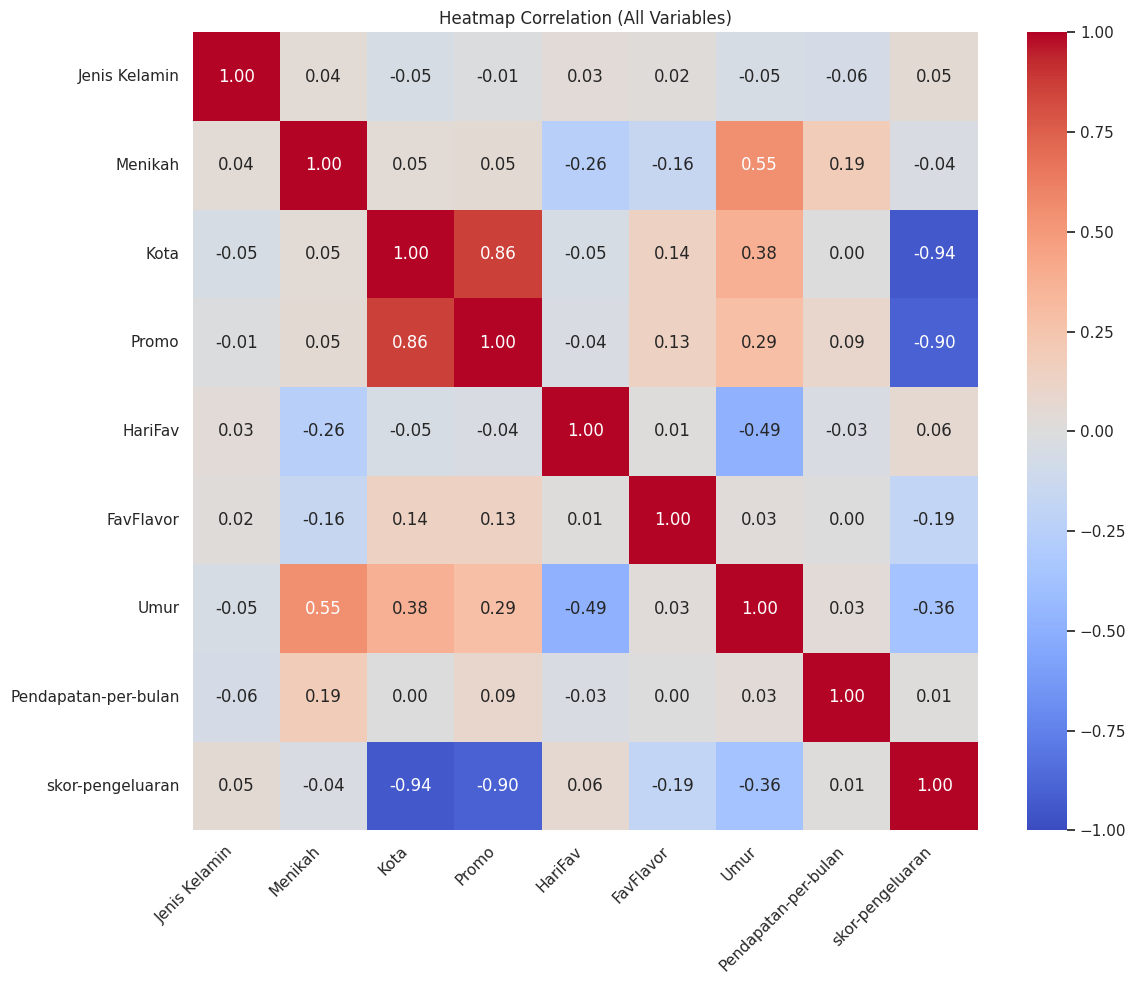

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Menggabungkan data frame, ensure it's a DataFrame
Data2_model = pd.merge(Data2_encode, Data2_std, left_index=True, right_index=True, how='left')
print(Data2_model.head())


# Mengganti nilai yang hilang dengan median untuk kolom numerik
numeric_columns = Data2_model.select_dtypes(include=['int64', 'float64']).columns
Data2_model[numeric_columns] = Data2_model[numeric_columns].fillna(Data2_model[numeric_columns].median())

# Hitung korelasi
correlation = Data2_model.corr()

# Buat heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Heatmap Correlation (All Variables)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Heatmap yang dihasilkan menggambarkan matriks korelasi antara berbagai variabel dalam dataset. Terdapat beberapa temuan kunci dari analisis ini. Pertama, Kota menunjukkan korelasi positif yang kuat dengan Promo (0.86) dan HariFav (0.55), menandakan bahwa peningkatan nilai dalam variabel Kota berhubungan dengan kenaikan pada nilai Promo dan Hari Favorit.

Di sisi lain, terdapat korelasi negatif yang signifikan antara Kota dan skor-pengeluaran (-0.94), serta antara Promo dan skor-pengeluaran (-0.90). Ini menunjukkan bahwa semakin tinggi nilai pada variabel Kota dan Promo, semakin rendah skor pengeluaran, mengindikasikan perilaku konsumsi yang berbeda. HariFav juga menunjukkan korelasi negatif dengan skor-pengeluaran (-0.49).

Sementara itu, Jenis Kelamin dan Menikah memiliki korelasi rendah dengan variabel lain, menunjukkan bahwa status gender dan pernikahan tidak banyak berpengaruh terhadap variabel lainnya. Secara keseluruhan, heatmap memberikan gambaran visual yang jelas tentang hubungan antar variabel, dengan warna merah menunjukkan korelasi positif dan warna biru menunjukkan korelasi negatif.

#Clustering

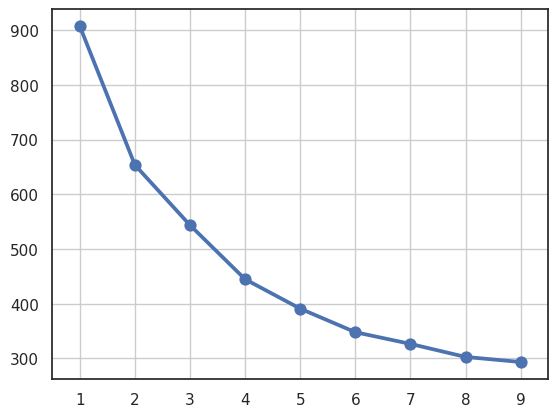

In [36]:
# Melakukan Iterasi untuk mendapatkan nilai Cost
cost = {}
for k in range(1,10):
  kproto_clustering = KPrototypes(n_clusters = k, random_state = 0)
  kproto_clustering.fit_predict(Data2_model, categorical = [0,1,2,3,4,5])
  cost[k] = kproto_clustering.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

 Penurunan inertia signifikan terjadi saat jumlah cluster meningkat dari 1 hingga sekitar 4 atau 5. Setelah itu, penurunan menjadi lebih lambat, dan grafik mulai mendatar. Titik elbow yang menunjukkan jumlah cluster optimal berada di sekitar 4.

Membuat Model

In [37]:
kproto_clustering = KPrototypes(n_clusters = 4, random_state = 0)
kproto_clustering = kproto_clustering.fit(Data2_model, categorical = [0,1,2,3])

#Save Model
pickle.dump(kproto_clustering, open('cluster.pkl', 'wb'))

Menggunakan Model

In [38]:
# Menentukan segmen tiap pelanggan
clusters = kproto_clustering.predict(Data2_model, categorical = [0,1,2,3])
print('Segmen Pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
Data2_final = Data2.copy()
Data2_final['cluster'] = clusters
print(Data2_final.head(15))

Segmen Pelanggan: [3 0 3 0 1 2 1 2 1 1 1 3 1 3 0 3 3 0 3 0 1 1 3 3 0 2 2 3 1 1 2 3 0 1 2 1 2
 2 0 1 2 2 3 2 2 0 2 0 0 2 0 2 0 3 3 3 3 2 3 3 1 3 3 0 0 3 3 0 2 1 3 3 3 3
 1 0 3 3 2 1 2 3 2 1 3 0 3 1 3 2 0 0 3 2 3 0 0 3 3 0 3 3 1 3 3 1 2 1 1 0 1
 2 1 3 3 3 0 3 2 3 0 2 1 3 2 0 0 1 0 3 2 0 1 1 3 1 1 1 2 3 2 1 0 2 0 1 3 1
 0 2 2 0 3 2 2 3 2 1 3 2 1 2 3 2 3 1 1 1 3 1 0 3 1 1 1 1 1 1 3 3 2 3 1 1 3
 1 2 3 0 3 2 1 3 3 2 0 1 2 0]

     ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0   101        Wanita    49              13114754                52       1   
1   102        Wanita    32              33606557                86       1   
2   103          Pria    51              15983606                41       1   
3   104          Pria    19              12704918                55       0   
4   105        Wanita    38              20081967                42       1   
5   106        Wanita    33              29098360                95       1   
6   107          Pria  

Menampilkan Cluster Tiap Pelanggan

In [39]:
# Menampilkan data pelanggan berdasarkan clusternya
for i in range (0,5):
    print('\nPelanggan Cluster: {}\n'.format(i))
    print(Data2_final[Data2_final['cluster'] == i])


Pelanggan Cluster: 0

      ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
1    102        Wanita    32              33606557                86       1   
3    104          Pria    19              12704918                55       0   
14   115        Wanita    58               2049180                15       1   
17   118        Wanita    32              25000000                87       1   
19   120        Wanita    49               9836065                28       1   
24   125          Pria    39              22950819                75       1   
32   133        Wanita    36              28688524                75       1   
38   139          Pria    48              18442622                49       1   
45   146          Pria    59              15983606                47       1   
47   148        Wanita    36              29508196                10       1   
48   149        Wanita    40              18442622                40       1   
50   151         

Visualisasi Hasil Clustering


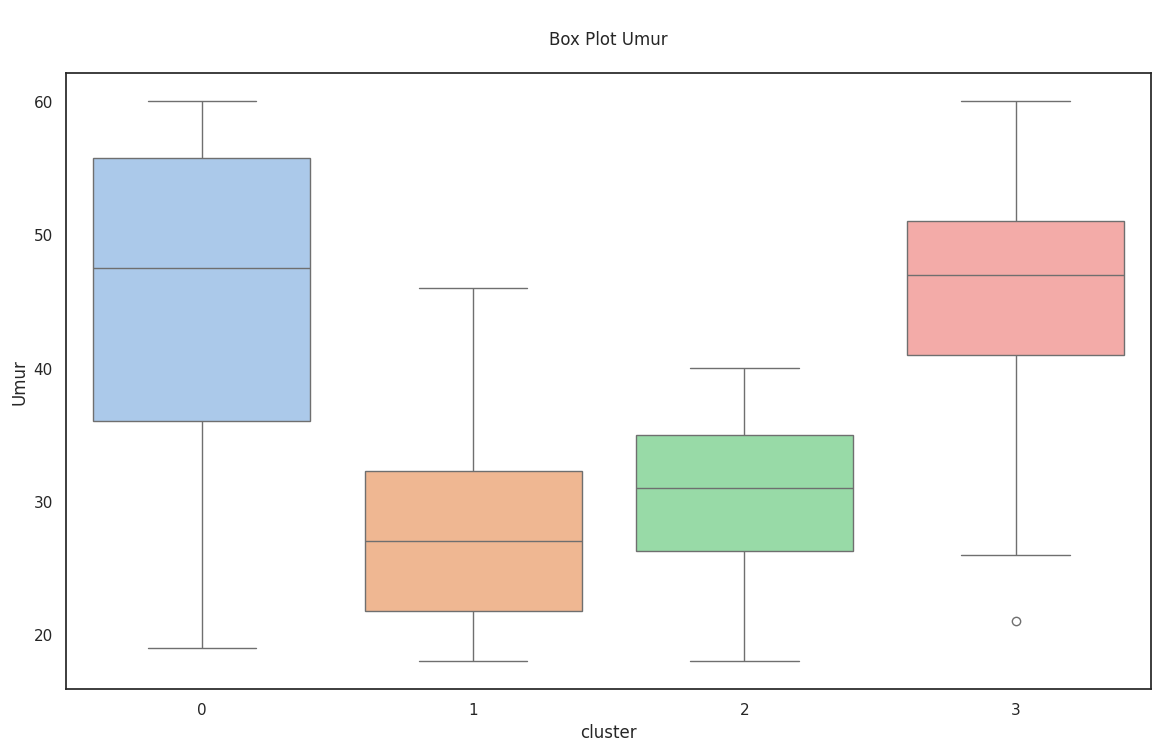

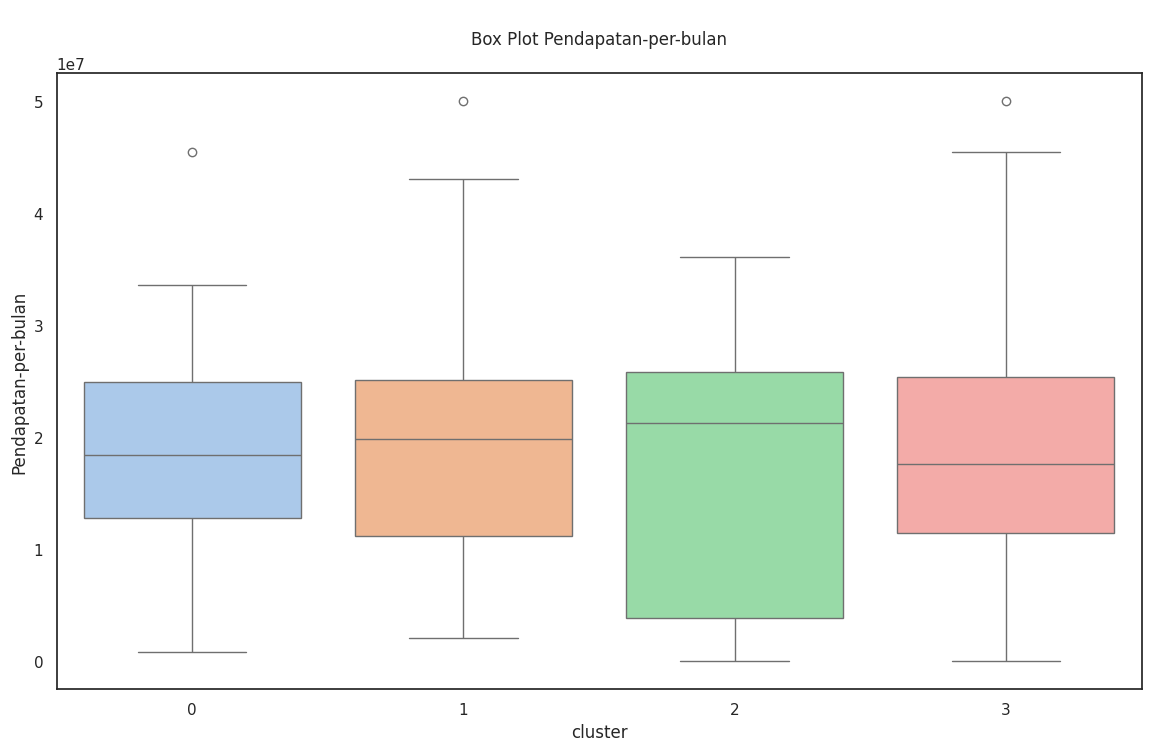

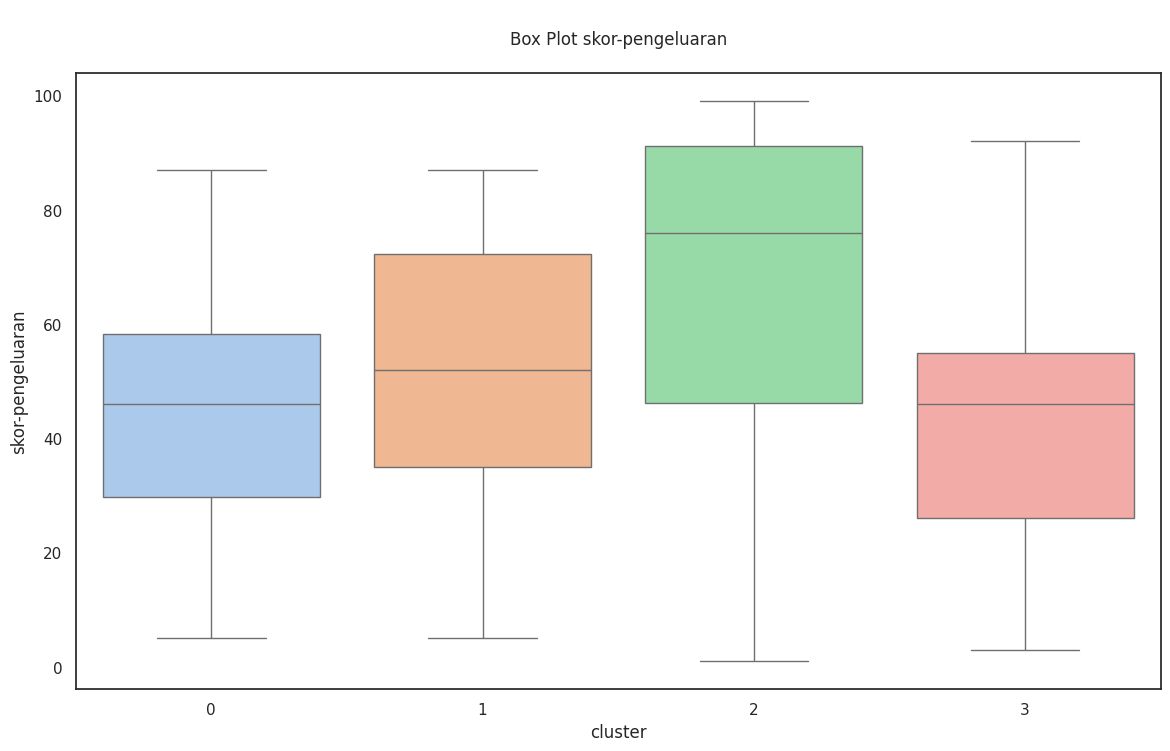

In [40]:
for i in kolom_numerik:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = Data2_final, palette='pastel')
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

**Distribusi Umur:**

Setiap cluster memiliki distribusi umur yang berbeda-beda.
Cluster 0 dan Cluster 3 memiliki rentang usia yang lebih luas dibandingkan cluster lainnya. Median usia di kedua cluster ini relatif lebih tinggi, yang mengindikasikan bahwa kelompok pelanggan di dalamnya cenderung lebih tua.
Cluster 1 terdiri dari pelanggan yang lebih muda, dengan rentang usia yang lebih sempit. Hal ini menunjukkan bahwa cluster ini lebih didominasi oleh individu berusia lebih muda.
Cluster 2 memiliki distribusi usia yang lebih sempit dan median usia yang sedikit lebih rendah dibandingkan cluster 0 dan 3, tetapi lebih tinggi daripada Cluster 1.

**Distribusi Pendapatan-per-bulan:**

Setiap cluster juga menunjukkan perbedaan dalam distribusi pendapatan per bulan.
Cluster 0 dan Cluster 3 memiliki variasi pendapatan yang lebih besar, dengan beberapa pelanggan memiliki pendapatan yang sangat tinggi (outliers). Hal ini menunjukkan bahwa dalam kedua cluster ini terdapat kelompok dengan tingkat pendapatan yang jauh di atas rata-rata.
Cluster 1 dan Cluster 2 memiliki rentang pendapatan yang lebih terpusat, namun Cluster 1 tetap memiliki beberapa individu dengan pendapatan tinggi. Cluster 2 adalah cluster yang paling stabil tanpa adanya outliers yang signifikan, menunjukkan bahwa pendapatan di cluster ini lebih merata.

**Distribusi Skor Pengeluaran:**

Distribusi skor pengeluaran menunjukkan bahwa setiap cluster memiliki pola yang berbeda. Cluster 0 dan Cluster 3 memiliki variasi pengeluaran yang lebih luas, mencerminkan anggota dengan pengeluaran yang lebih beragam. Cluster 1 dan Cluster 2 cenderung memiliki pengeluaran yang lebih terpusat, dengan Cluster 2 menunjukkan skor pengeluaran tertinggi dan distribusi yang lebih besar. Sementara itu, Cluster 3 menunjukkan distribusi yang lebih stabil dan merata tanpa adanya pengeluaran yang ekstrem.

Visualisasi Hasil Clustering-Count Plot

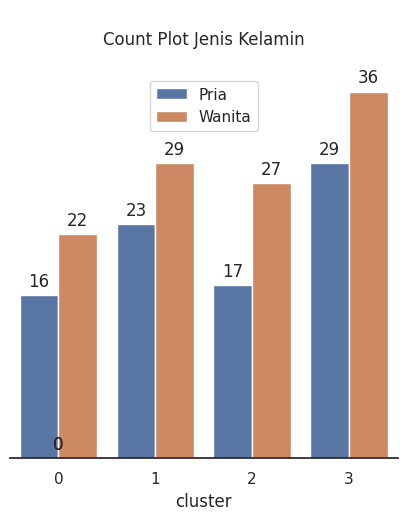

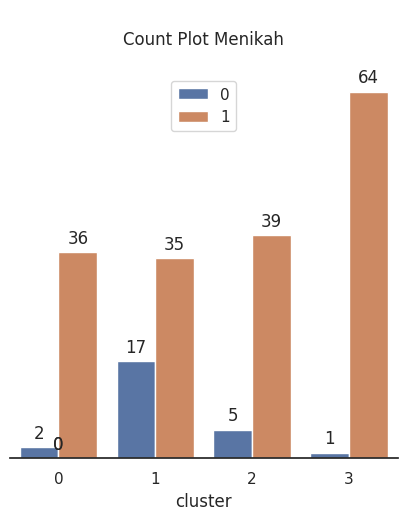

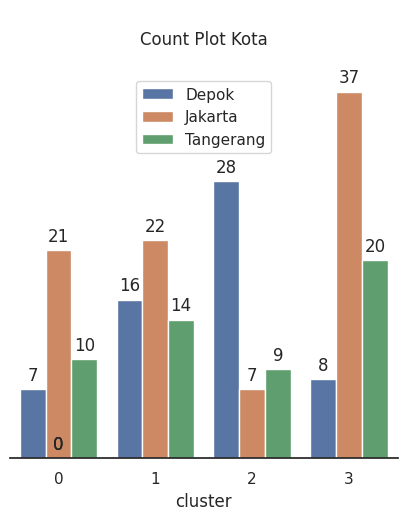

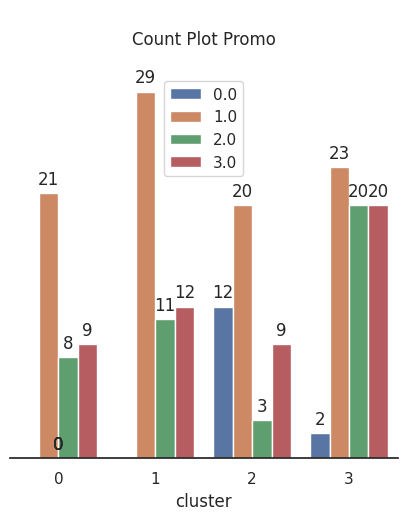

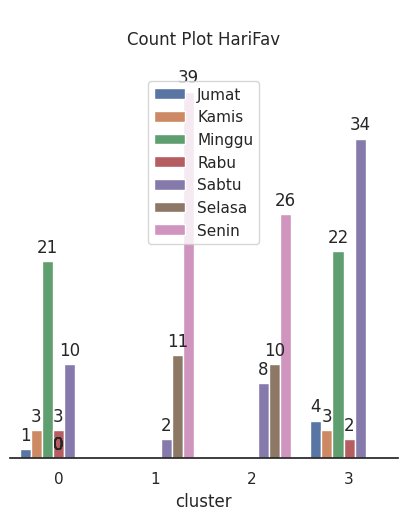

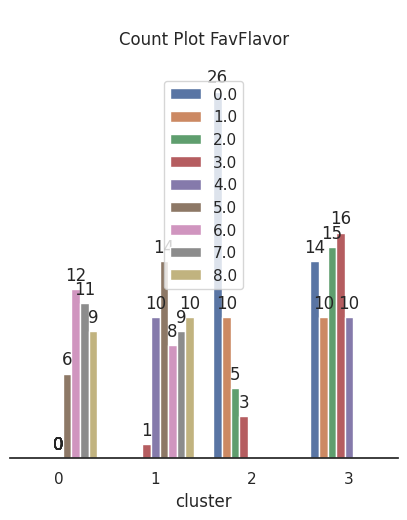

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop over the categorical columns
for i in kolom_kategorik:
    plt.figure(figsize=(5, 5))

    # Create countplot with clusters and categorical variable
    ax = sns.countplot(data=Data2_final, x='cluster', hue=i)
    plt.title(f'\nCount Plot {i}\n', fontsize=12)
    ax.legend(loc="upper center")

    # Add annotations for each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),  # Display the height of the bar
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Position at the center of each bar
                    ha='center', va='center', xytext=(0, 10),  # Offset the text by 10 points in y direction
                    textcoords='offset points')

    # Clean up the plot
    sns.despine(right=True, top=True, left=True)
    ax.axes.yaxis.set_visible(False)  # Hide the y-axis labels and ticks
    plt.show()


1. **Jenis Kelamin**

**Insight:**

Cluster 3 memiliki dominasi responden perempuan (kategori "1"), sementara kluster 0 lebih didominasi oleh laki-laki (kategori "0").

**Rekomendasi:**

Dalam ekspansi, MixITup dapat mempertimbangkan pendekatan yang lebih feminin di kota-kota besar, seperti Jakarta. Ini bisa berarti mengembangkan produk baru yang lebih menarik bagi perempuan, seperti rasa-rasa manis atau paket spesial. Sementara itu, di kota yang lebih banyak didominasi laki-laki, MixITup bisa mengembangkan menu atau paket yang lebih berfokus pada minuman seperti Boba Drinks yang cenderung populer di kalangan laki-laki.

2. **Menikah**
**Insight:**  
Cluster 3 sebagian besar terdiri dari responden yang sudah menikah (kategori "1"), sedangkan kluster 0 juga sebagian besar sudah menikah, namun dengan perbedaan yang lebih sedikit.

**Rekomendasi:**
Untuk kluster dengan mayoritas responden yang sudah menikah (misalnya kluster 3), MixITup bisa mempertimbangkan untuk menawarkan paket keluarga atau promosi berbasis kelompok. Ini bisa menarik pelanggan yang datang bersama keluarga atau dalam kelompok, terutama di kota besar di mana MixITup memiliki basis pelanggan yang kuat.

3. **Kota**

**Insight:**

Kluster 3 memiliki dominasi pada kategori kota "2" (mungkin Jakarta atau kota besar lainnya) dengan 37 orang. Sementara kluster 0 didominasi oleh kategori "0" (kemungkinan kota kecil atau pinggiran) dengan 21 orang.

**Rekomendasi:**

Kota-kota besar yang mirip dengan Jakarta sebaiknya menjadi prioritas ekspansi karena jumlah pelanggan potensial di kota besar lebih tinggi. Misalnya, MixITup dapat mempertimbangkan ekspansi ke Surabaya atau Bandung yang memiliki populasi dan gaya hidup serupa.



4. **Promo**

**Insight:**

Kluster 0 dan kluster 3 memiliki mayoritas responden yang tidak tertarik dengan promosi (kategori "0"). Di sisi lain, kluster 1 dan kluster 2 menunjukkan lebih banyak variasi dalam ketertarikan terhadap promo.

**Rekomendasi:**

Saat menjalankan kampanye marketing yang lebih besar, MixITup dapat menyesuaikan pendekatan promosinya berdasarkan karakteristik kluster. Untuk kota-kota besar, MixITup dapat lebih fokus pada kualitas produk atau kampanye branding ketimbang promosi diskon. Sementara untuk kota-kota pinggiran, strategi promosi yang agresif dapat meningkatkan penjualan.


5. **HariFav**
**Insight:**

Kluster 3 menunjukkan preferensi yang kuat terhadap hari dengan kategori "2" (mungkin akhir pekan atau hari tertentu dengan acara spesial), sementara kluster 0 menunjukkan preferensi terhadap kategori "0".

**Rekomendasi:**

Saat mengembangkan strategi marketing, MixITup dapat meluncurkan promosi yang terfokus pada hari tertentu, misalnya promo spesial di akhir pekan untuk menarik pengunjung lebih banyak ke cabang di kota besar. Di kota-kota kecil atau pinggiran, mungkin lebih relevan menawarkan promosi sepanjang minggu.

6. **FavFlavor**

**Insight:**

Kluster 0 menunjukkan preferensi yang sangat kuat terhadap rasa di kategori "0" (mungkin rasa umum atau populer seperti coklat atau vanilla). Di sisi lain, kluster 3 lebih menyukai rasa unik di kategori "6".

**Rekomendasi:**

MixITup dapat mengembangkan strategi produk yang beragam tergantung kota. Di kota besar, MixITup dapat fokus memperkenalkan rasa-rasa baru dan eksperimental yang lebih menarik bagi pelanggan kota besar. Sementara di kota pinggiran atau lebih kecil, mempertahankan rasa-rasa populer dapat tetap mendukung penjualan.

Menamakan Cluster

In [42]:
# Mapping nama kolom
Data2_final['Segmen'] = Data2_final['cluster'].map({
0: 'Regular Member',
1: 'Premium Member',
2: 'VIP Member',
3: 'Elite Member'
})

print(Data2_final.info())
print(Data2_final.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    199 non-null    int64   
 1   Jenis Kelamin         199 non-null    category
 2   Umur                  199 non-null    int64   
 3   Pendapatan-per-bulan  199 non-null    int64   
 4   skor-pengeluaran      199 non-null    int64   
 5   Menikah               199 non-null    category
 6   Kota                  199 non-null    category
 7   Promo                 199 non-null    category
 8   HariFav               199 non-null    category
 9   FavFlavor             199 non-null    category
 10  cluster               199 non-null    uint16  
 11  Segmen                199 non-null    object  
dtypes: category(6), int64(4), object(1), uint16(1)
memory usage: 12.2+ KB
None
    ID Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0  101        

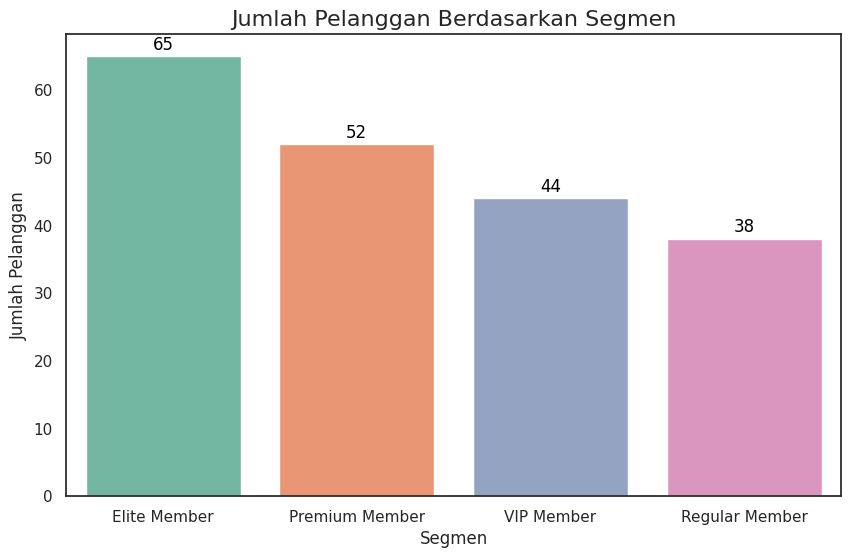

In [43]:
# Menyiapkan ukuran gambar agar lebih besar
plt.figure(figsize=(10, 6))

# Membuat barplot untuk menampilkan jumlah pelanggan berdasarkan segmen
sns.barplot(x=Data2_final['Segmen'].value_counts().index,
            y=Data2_final['Segmen'].value_counts().values,
            palette='Set2')

# Memberikan judul dan label pada grafik
plt.title('Jumlah Pelanggan Berdasarkan Segmen', fontsize=16)
plt.xlabel('Segmen', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)

# Menambahkan jumlah total di atas setiap bar
total_counts = Data2_final['Segmen'].value_counts()
for i, count in enumerate(total_counts.values):
    plt.text(i, count + 1, str(count), ha='center', fontsize=12, color='black')

# Menampilkan plot
plt.show()

**Insight:**
1. **Elite Member memiliki jumlah pelanggan tertinggi:**

  * 65 pelanggan, yang merupakan jumlah terbesar di antara semua segmen.
  * Ini menunjukkan bahwa segmen "Elite Member" mungkin memiliki penawaran yang menarik atau keuntungan eksklusif yang lebih disukai pelanggan.

  **Rekomendasi:**
    
    Dengan jumlah pelanggan yang paling tinggi, fokus untuk mempertahankan Elite Member dengan menawarkan program loyalitas eksklusif atau penawaran tambahan. Mungkin juga dapat meningkatkan segmentasi lebih lanjut untuk mengidentifikasi kebutuhan spesifik dari anggota Elite.

2. **Premium Member dan VIP Member cukup seimbang:**

  * Premium Member memiliki 52 pelanggan, sedangkan VIP Member memiliki 44 pelanggan.
  * Meskipun tidak sebanyak Elite Member, kedua segmen ini juga memiliki pangsa pasar yang cukup besar.

  **Rekomendasi:**

  Untuk Premium dan VIP, pertimbangkan untuk mengadakan promosi khusus atau meningkatkan manfaat keanggotaan yang dapat menarik lebih banyak pelanggan. Misalnya, upgrade gratis dari Premium ke VIP atau dari VIP ke Elite bisa menjadi strategi yang efektif.

3. **Regular Member memiliki pelanggan paling sedikit:**

  Dengan hanya 38 pelanggan, ini menunjukkan bahwa segmen ini mungkin kurang menarik dibandingkan segmen lainnya, atau mungkin memiliki manfaat yang tidak terlalu berbeda dibanding segmen yang lebih tinggi.

  **Rekomendasi:**

  Karena Regular Member memiliki pelanggan paling sedikit, lakukan analisis lebih lanjut untuk mengetahui alasan mengapa segmen ini kurang diminati. Apakah karena penawaran yang kurang menarik, atau perbedaan manfaat yang tidak signifikan dibanding segmen lainnya, Penawaran yang lebih kompetitif atau memberikan insentif untuk upgrade ke Premium atau VIP dapat menjadi solusi.


Dengan informasi ini, strategi marketing dapat lebih difokuskan pada segmentasi pelanggan yang tepat. Misalnya, menggunakan kampanye email marketing khusus untuk masing-masing segmen untuk meningkatkan keloyalan pelanggan dan menarik pelanggan baru. Pada intinya, MixITup bisa fokus untuk mempertahankan pelanggan Elite dan mendorong pertumbuhan di segmen Premium dan VIP bisa memberikan dampak yang signifikan pada pertumbuhan bisnis.

# Menggunakan K-Means

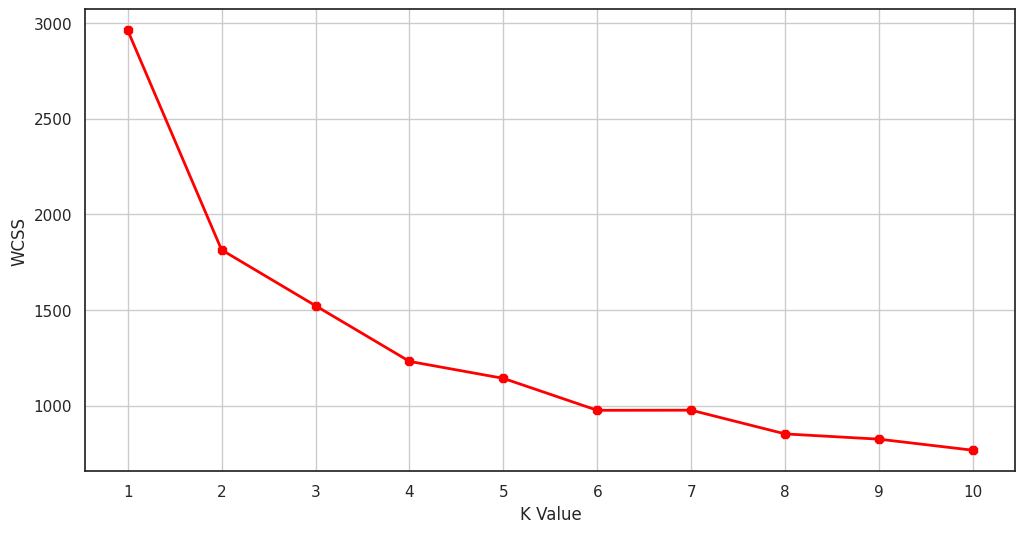

In [44]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(Data2_model.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [45]:
from sklearn import cluster, datasets
random_state = 0

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

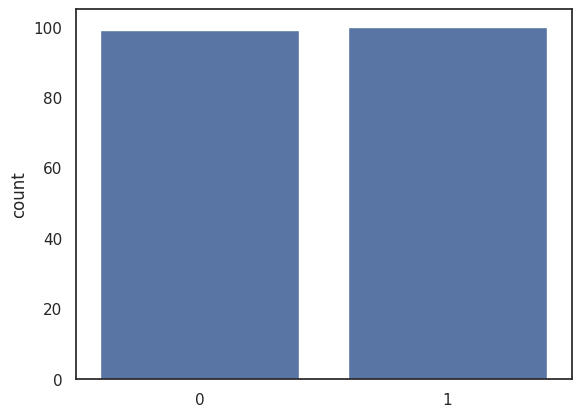

In [46]:
# k-means++ clustering
k = 2
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(Data2_model)
C_kmpp = kmPP.predict(Data2_model)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

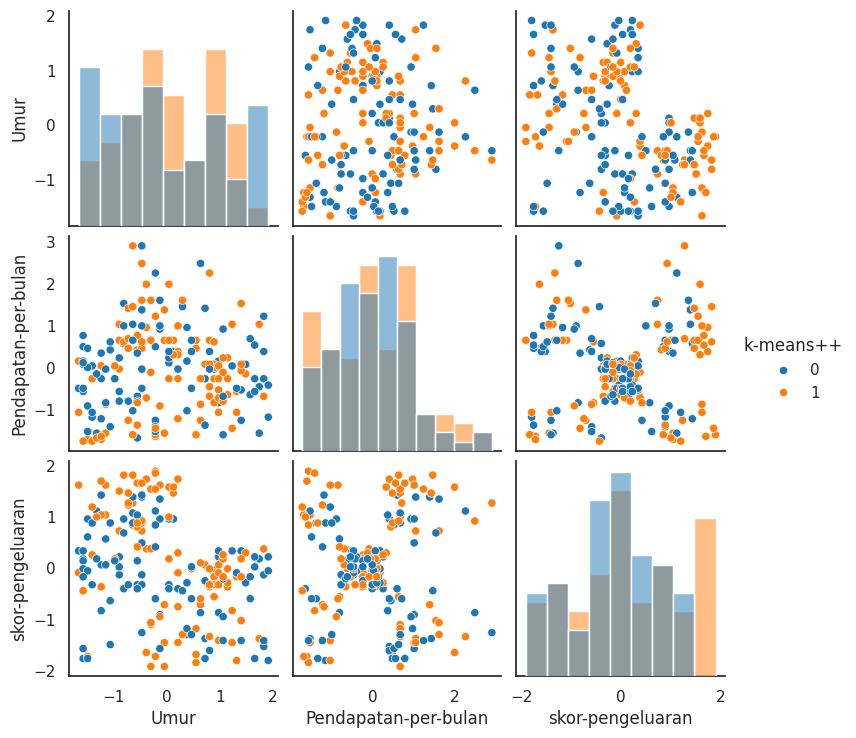

In [47]:
Data2_model['k-means++'] = C_kmpp
g = sns.pairplot(Data2_model[['Umur', 'Pendapatan-per-bulan','skor-pengeluaran' ,'k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

## Menggunakan Hierarchical Clustering

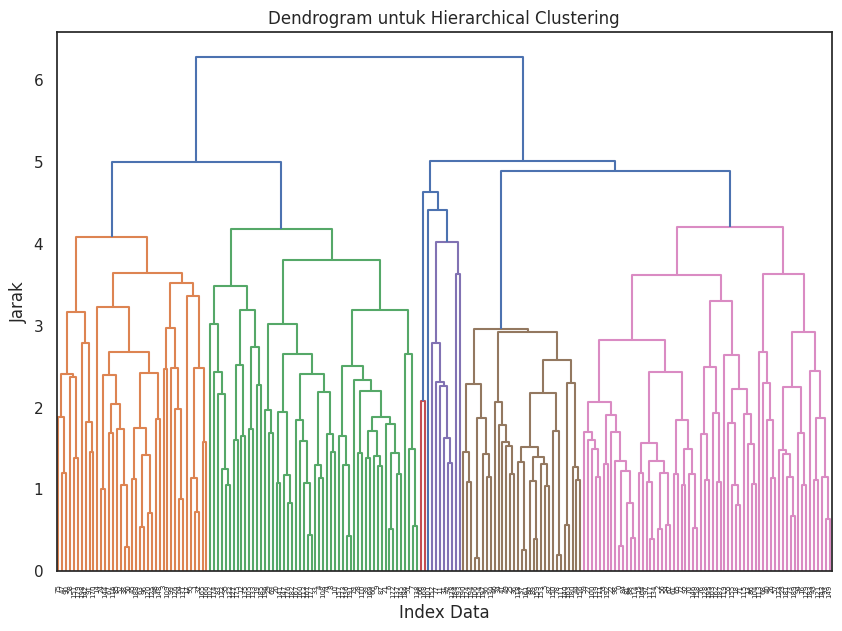

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# 1. Persiapkan Data
X, _ = make_blobs(n_samples=50, centers=3, cluster_std=0.60, random_state=0)

# 2. Hitung Jarak dan Lakukan Clustering
# Menggunakan metode 'average' untuk linkage
Z = linkage(Data2_model, method='average')

# 3. Visualisasikan Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram untuk Hierarchical Clustering')
plt.xlabel('Index Data')
plt.ylabel('Jarak')
plt.show()

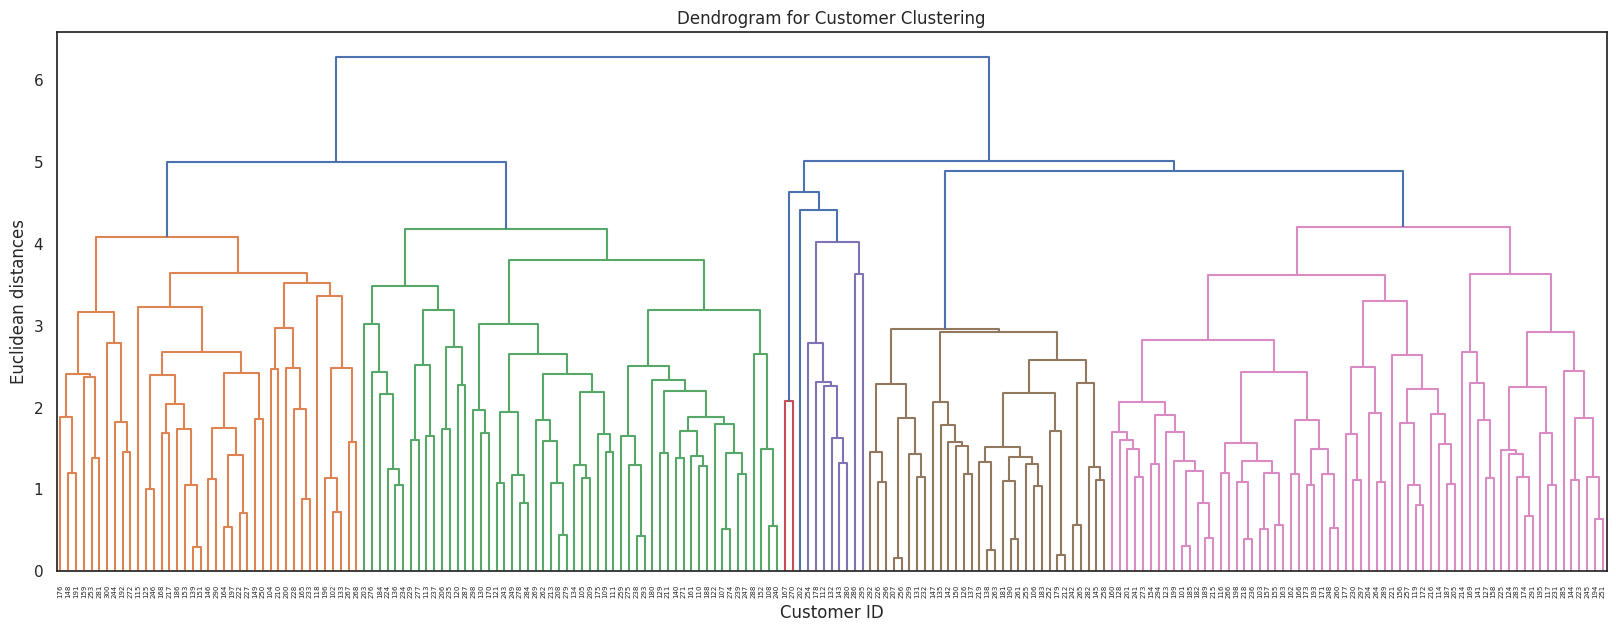

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as pl

# Perform hierarchical clustering
Z = linkage(Data2_model, method='average')

# Plot the dendrogram
plt.figure(figsize=(20, 7))
dendrogram(Z, labels=Data2['ID'].values, leaf_rotation=90)
plt.title('Dendrogram for Customer Clustering')
plt.xlabel('Customer ID')
plt.ylabel('Euclidean distances')
plt.show()

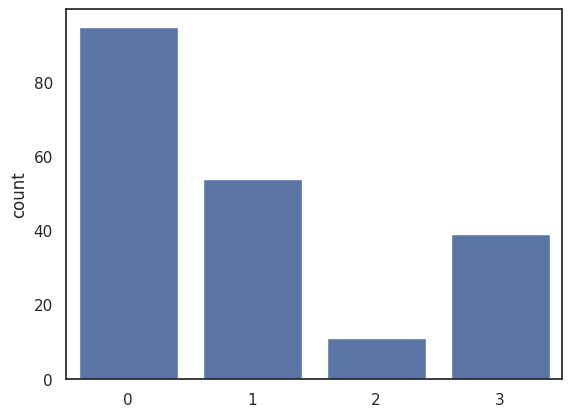

In [50]:
from sklearn.cluster import AgglomerativeClustering # Import the class directly

# Remove the 'affinity' parameter since it's not needed for 'average' linkage
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='average')
hierarchical.fit(Data2_model)
C_h = hierarchical.labels_.astype(int)
# Assuming you intended to use countplot
sns.countplot(x=C_h)
plt.show()

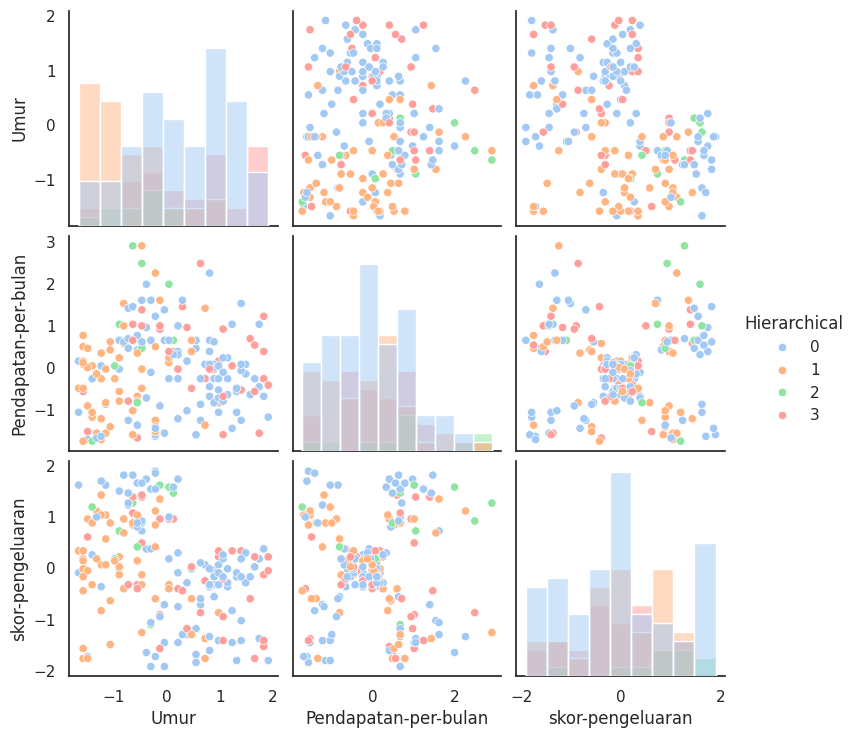

In [51]:
Data2_model['Hierarchical'] = C_h
g = sns.pairplot(Data2_model[['Umur','Pendapatan-per-bulan','skor-pengeluaran', 'Hierarchical']], \
                 hue="Hierarchical", diag_kind="hist", palette="pastel")

1. **Distribusi Cluster:**

  * Cluster 0 (biru) terlihat memiliki distribusi yang lebih luas pada semua variabel, terutama pada Pendapatan per Bulan dan Skor Pengeluaran, menunjukkan bahwa cluster ini mungkin terdiri dari pelanggan dengan karakteristik yang lebih beragam.
  * Cluster 1 (oranye) tersebar lebih merata di semua variabel, tetapi tidak menonjol secara khusus dalam satu variabel tertentu.
  * Cluster 2 (hijau) memiliki jumlah yang relatif lebih sedikit dan terlihat terfokus pada bagian tengah rentang nilai di semua variabel. Hal ini menunjukkan bahwa anggota cluster ini memiliki karakteristik yang lebih terpusat (tidak terlalu ekstrim pada skor pengeluaran atau pendapatan).
  * Cluster 3 (merah muda) tersebar pada kisaran rendah di semua variabel, terutama di variabel Pendapatan per Bulan dan Skor Pengeluaran.

2. **Korelasi Antar Variabel:**

Hubungan antara Pendapatan per Bulan dan Skor Pengeluaran tampak memberikan pengelompokan yang lebih jelas dibandingkan hubungan dengan Umur. Hal ini terlihat dari pemisahan antar cluster yang lebih terdefinisi dalam scatter plot antara Pendapatan per Bulan dan Skor Pengeluaran.
Umur tampaknya tidak menjadi pemisah yang sangat kuat antar cluster, karena scatter plot dengan variabel ini tidak menunjukkan perbedaan yang signifikan antar cluster.

3. **Pola Skor Pengeluaran dan Pendapatan:**

Cluster dengan Pendapatan per Bulan yang tinggi (terutama Cluster 0) juga cenderung memiliki Skor Pengeluaran yang tinggi. Hal ini mengindikasikan bahwa pendapatan dan pengeluaran pelanggan terkait secara kuat dalam beberapa cluster.

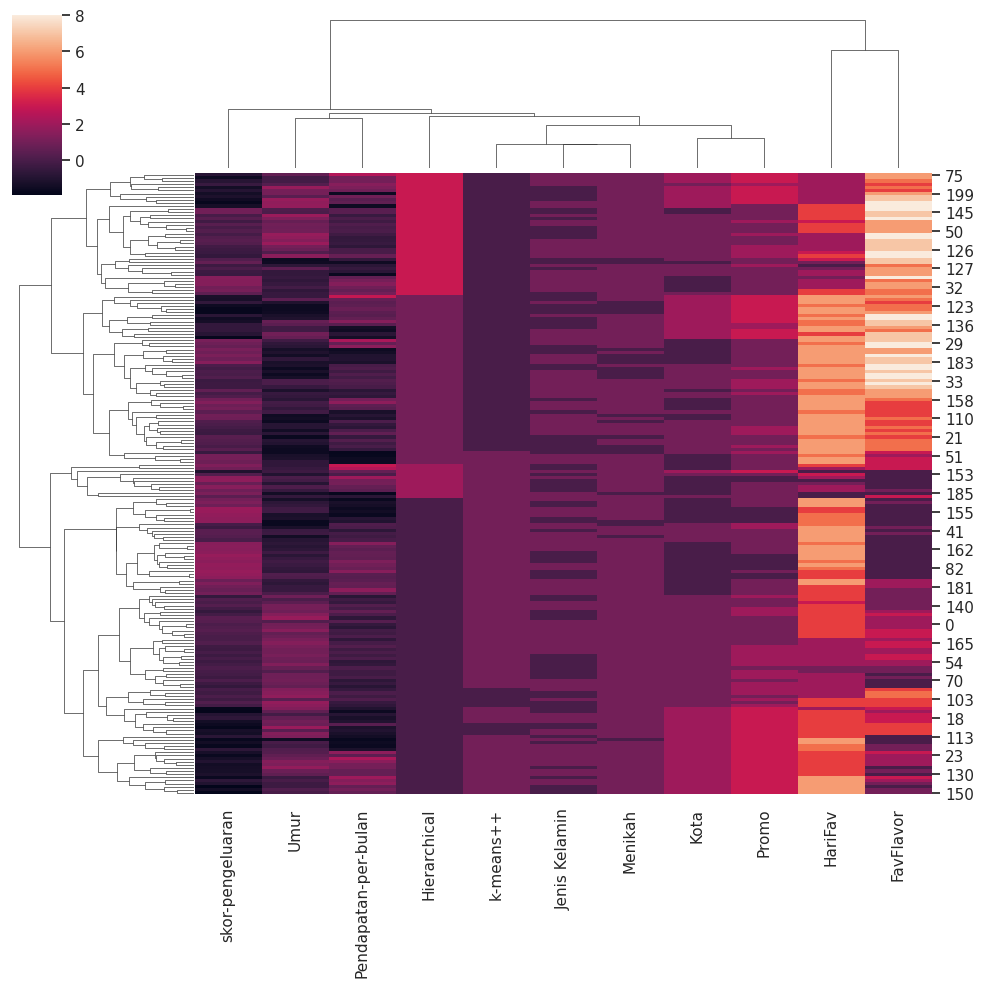

In [52]:
g = sns.clustermap(Data2_model, method="average", metric="euclidean")

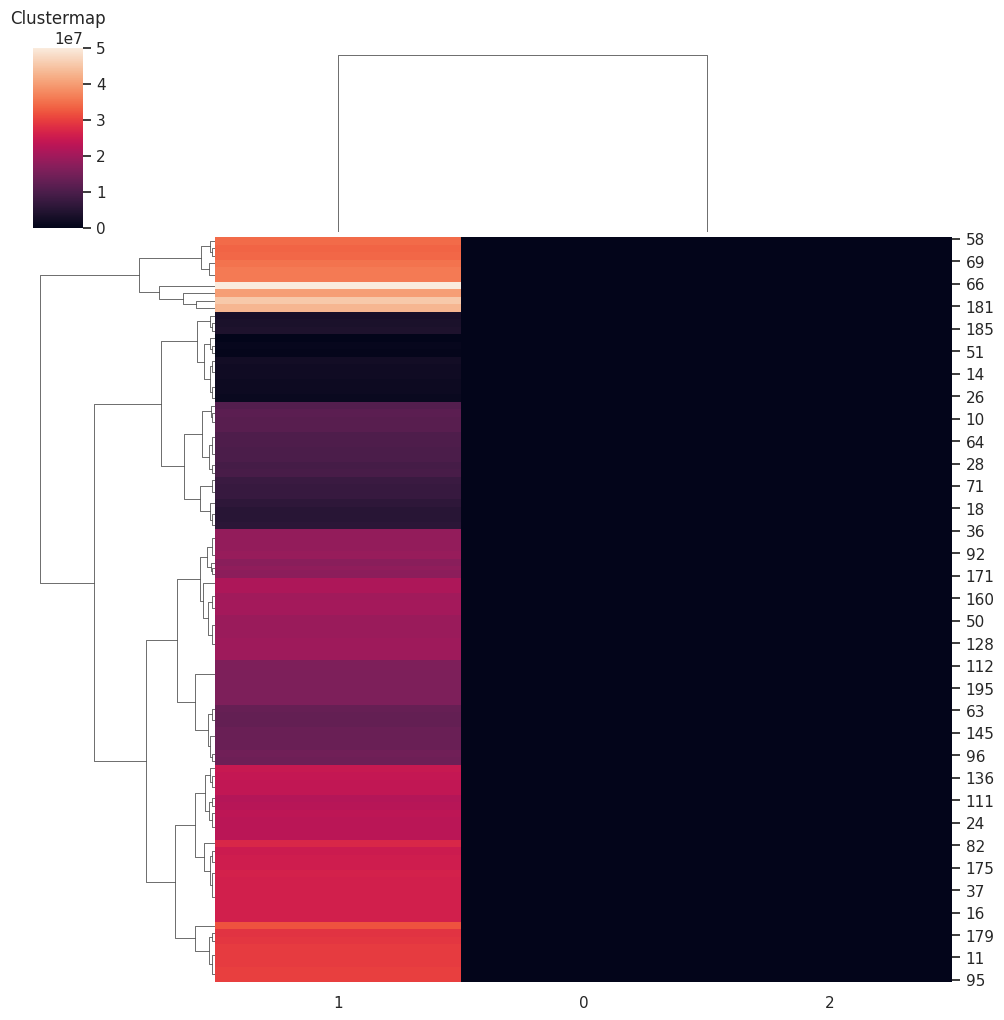

In [53]:
# Dendogram cluster
g = sns.clustermap(Data2_final[['Umur','Pendapatan-per-bulan','skor-pengeluaran']].values, method="average", metric="euclidean")
plt.title('Clustermap')
plt.show()

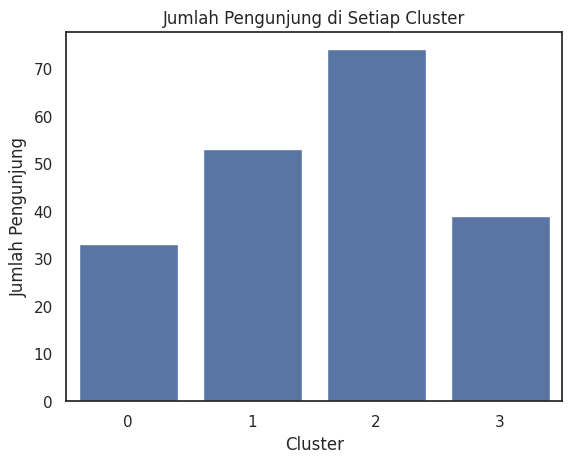

[2 3 2 1 2 3 1 1 1 1]


In [54]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Data2_model is your DataFrame
# Select numeric columns (e.g., 'Umur' and 'Pendapatan-per-bulan')
kolom_num = ['Umur', 'Pendapatan-per-bulan']  # Updated with correct column names from Data2_model

# If 'Skor Pengeluaran' exists in your DataFrame, include it as well:
# kolom_num = ['Umur', 'Pendapatan-per-bulan', 'Skor Pengeluaran']

kolom_num = Data2_model[kolom_numerik]

# Initialize Agglomerative Clustering model
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='average', metric='euclidean')
hierarchical.fit(kolom_num)  # Use numeric data here

# Assign the cluster labels to the 'labels' variable
labels = hierarchical.labels_  # This line was previously commented out, causing the error.

Data2_model['hierarchical'] = labels  # Now 'labels' is defined and can be used.

# Get cluster labels
C_h = hierarchical.labels_.astype(int)

# Visualize the number of data points in each cluster
sns.countplot(x=C_h)
plt.title('Jumlah Pengunjung di Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Pengunjung')
plt.show()

# Display the first 10 cluster labels
print(C_h[:10])

**Insight:**

Dari diagram di atas, dapat dilihat bahwa cluster 2 memiliki jumlah pengunjung paling banyak dan cluster 3 memiliki jumlah pengunjung paling sedikit, sementara cluster 1 dan cluster 0 memiliki jumlah pengunjung yang mendekati rata-rata, dengan cluster 1 sedikit lebih tinggi dari cluster 0.

**Rekomendasi:**

* MixITup bisa meningkatkan engagement dengan menawarkan promo loyalitas seperti diskon atau event eksklusif melalui pelanggan yang berada di cluster 2, karena cluster ini memiliki pengunjung terbanyak.
* Karena cluster 3 memiliki pengunjung paling sedikit, MixITup bisa melakukan analisis seperti survey kepuasan untuk memcari tahu alasan mengapa pengunjung pada cluster 3 relatif lebih sedikit. Setelah mengetahui alasannya, dapat dilakukan penyesuaian produk, harga, atau promosi yang lebih spesifik untuk menarik lebih banyak pengunjung.
* Untuk cluster 0 dan 1, bisa dilakukan promosi yang lebih fokus untuk meningkatkan jumlah pengunjung lebih jauh. Misalnya, berikan insentif bagi pengunjung yang datang bersama teman atau kampanye referral untuk meningkatkan basis pengunjung di cluster ini.

---

* Cluster 0 (Regular Member):

Karakteristik: Mayoritas pria, pendapatan menengah, suka rasa klasik (vanila/coklat), belanja pada hari kerja.

Rekomendasi: Fokus pada produk klasik dan paket hemat. Branding lebih efektif daripada promosi diskon.

* Cluster 1 (Premium Member):

Karakteristik: Usia muda, responsif terhadap diskon, cenderung mencoba rasa baru.

Rekomendasi: Berikan diskon dan promosi kreatif. Fokus pada inovasi produk dan pemasaran digital.

* Cluster 2 (VIP Member):

Karakteristik: Pendapatan stabil, belanja tertinggi, lebih suka produk premium dan eksklusif.

Rekomendasi: Tawarkan produk premium/eksklusif dan program loyalitas.

* Cluster 3 (Elite Member):

Karakteristik: Mayoritas wanita, berbelanja di akhir pekan, lebih tertarik pada rasa unik.

Rekomendasi: Fokus pada rasa atau produk dengan warna dan rasa yang unik. Berikan juga diskon besar dan promosi akhir pekan.

---